# <center> CS 178: Machine Learning &amp; Data Mining </center>
## <center> Homework 2: Due Thursday 20 October 2022 (11:59pm) </center>
### <center> Version 1.0 (Last Modified: 9 October 2022) </center>

---
## Instructions


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it. 

Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Gradient Descent (50 points)
    - Problem 1.1: Visualize decision boundary of linear classifier (5 points)
    - Problem 1.2: Implement a function to compute mean squared error (MSE) (5 points)
    - Problem 1.3 Visualize the countour plot of MSE in  𝜃  space (10 points)
    - Problem 1.4: Write out the gradient of MSE. They then implement a function that computes this gradient (10 points)
    - Problem 1.5: Implement gradient descent with the gradient computed above. Create a plot of loss vs training iteration, to see it converges (10 points)
    - Problem 1.6: Plot the trajectory of gradient descent for a few steps. Describe in words what is happening (10 points)

- Problem 2: Logistic Regression (45 points)
    - Problem 2.1: Test logistic regression model implemented in sklearn (5 points)
    - Problem 2.2: Explore Yelp dataset (10 points)
    - Problem 2.3: Fit a logistic regression classifier on Yelp dataset. (10 points)
    - Problem 2.4: Find the top k most negative/most positive features and corresponding coefficients. (10 points)
    - Problem 2.5: Tune reguarlization parameter on Yelp dataset (10 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

**Important: Do not change any code we give you below, except for those marked by "YOUR CODE STARTS HERE" and "YOUR CODE ENDS HERE". This is to ensure your code has reproducible results and is important for grading.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

---
## Problem 1: Gradient Descent

In this problem, you will implement gradient descent to train a linear model without a bias unit on a 2D Dataset by using the mean square error as loss function. **This linear model can be written as $f(\textbf{x}; \theta) =   \theta_1 x_1 + \theta_2 x_2$, with zero intercept (or bias), i.e., we set $\theta_0=0$. We do this here for simplicity, in a real problem we would allow the algorithm to also learn a value for $\theta_0$). In this problem only $\theta_1$ and $\theta_2$ are optimized via gradient descent.**

Let's first load in the dataset by running the code cell below:

In [2]:
# Load the features and labels in the Iris dataset
iris_X, iris_y = load_iris(return_X_y=True)
iris_X_2 = iris_X[:, 0:2]                          # only use the first two features
X, y = iris_X_2[iris_y<2,:], iris_y[iris_y<2]      # only use the first two classes

y = (y - 0.5) * 2                                  # re-label class 0 with label value = -1, class 1 with label value = 1 

X = StandardScaler().fit_transform(X)              # scale the feature values (usually good to do this)

To help you visualize the data distribution, you are provided with the function `plot_data`. Run this function in order to create a scatter plot of the data you will be working with.

In [3]:
def plot_data(X, y):
    # Make a figure with 1 subplot
    fig, axes = plt.subplots()

    # Scatter plot of features in X
    feature_1 = X[:, 0]  # First column is the first feature
    feature_2 = X[:, 1]  # Second column is the second feature

    axes.scatter(feature_1, feature_2, c=y)
   
    axes.set_xlabel('Feature 1', fontsize=14)
    axes.set_ylabel('Feature 2', fontsize=14)
    axes.set_title('Scatter Plot of Data', fontsize=18);
    
    axes.set_xlim(-3,3)
    axes.set_ylim(-3,3) 
    
    return fig, axes

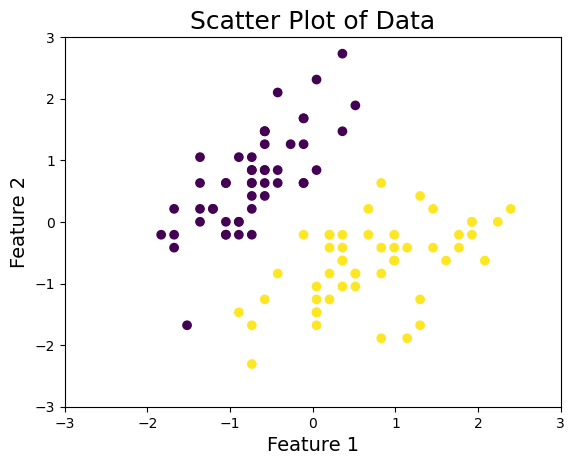

In [4]:
# Run the code below to illustrate the distribution of data points
fig, axes = plot_data(X, y)

For this problem, we will focus on the properties of the gradient descent algorithm, rather than classification
performance on a test set. Thus, we will not create a separate test dataset, and simply use all available data for training.

### Problem 1.1 (5 points): Visualize decision boundary of linear classifier

In our code, the variable `X` is a numpy array containing the feature vectors in this 2D dataset, and `y` is a numpy array containing the corresponding labels, which are either -1 or 1. We have a linear model $f(\textbf{x}; \theta) =  \theta_1 x_1 + \theta_2 x_2$, with zero bias (i.e., $\theta_0=0$), where $\textbf{x}$ is a feature vector and $\textbf{x}_j$ refers to the value of the $j$th component of the vector $\textbf{x}$. 

- Complete the function below that, given feature vectors `X`, labels `y`, and parameters `theta_1`, `theta_2`, plots the feature vectors colored as their classes and the decision boundary corresponding to values of `theta_1`, `theta_2`. Run the code given in the second cell below, and include the resulting plot in your submission.

Keep in mind that the points **do not** affect the linear classifier yet, we are only plotting the line in order to visualize it alongside the points. (Hint: The decision boundary is given by $\theta_1 x_1 + \theta_2 x_2 = 0$, consider using `axes.plot` to draw this function)

In [7]:
def plot_boundary(X, y, theta_1, theta_2): 
    '''
    X:       [# data points, # features], feature vectors
    y:       [# data points], labels
    theta_1: the first parameter of linear model
    theta_2: the second parameter of linear model
    '''
    
    fig, axes = plot_data(X, y)
    
    ### YOUR CODE STARTS HERE ###
    
    X_1 = X[:,0]
    X_2 = X[:,1]
    
    # Find X_2 as a linear equation of X_1, theta_1, and theta_2
    # And use it for parameter y
    axes.plot(X_1, (-1 * theta_1* X_1) / theta_2)



    ###  YOUR CODE ENDS HERE  ###

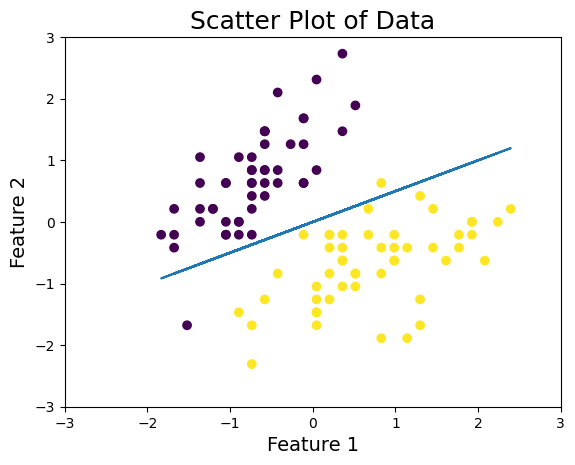

In [8]:
# Display the decision boundary of the linear model governed by the parameters we give you below.
# Run this after implementing plot_boundary, and include the resulting plot in your submission.
theta_1_random, theta_2_random = -0.5, 1
plot_boundary(X, y, theta_1_random, theta_2_random)

### Problem 1.2 (10 points): Loss function

In this problem, we will use the mean squared error (MSE), **which is 1/n times the squared error**, as our loss function for gradient decent. The MSE is essentially the same as the squared error loss function discussed in Lecture 5 other than it is scaled by a factor of 1/n, where n is the number of feature vectors.

- Write out the mathematical equation for the MSE loss function, denoted as $L (\theta_1, \theta_2)$. 

You can optionally use $\LaTeX$ to typeset your answer in the Jupyter notebook. Otherwise, write your answer on paper and take a picture, or use any other mathematical typesetting tools you have available to you. In order to include an image in Jupyter notebook, you save the image in the same directory as the .ipynb file and then write `![caption](image.png)`. Alternatively, you may go to Edit --> Insert Image at the top menu to insert an image into a Markdown cell. The caption may be anything you want, it will only be shown as alt text when hovering over the image.

**[Write your answer here]**
$$
L(\theta_1 , \theta_2) = \frac{1}{n} \sum_{i=1}^{n} (y_i-\theta_1 x_{i1}-\theta_2 x_{i2})^2
$$

- Implement the function `MSE` below.
- Report the MSE of the linear model defined by `theta_1_random` and `theta_2_random` (use the values defined earlier), for the dataset ($\textbf{X}$, $\textbf{y}$), i.e. the Iris data we used in Problem 1.1.

In [10]:
def predict(x_1, x_2, theta_1, theta_2):
    return theta_1 * x_1 + theta_2 * x_2


def MSE(X, y, theta_1, theta_2): 
    '''
    X:       [# data points, # features], feature vectors
    y:       [# data points], labels
    theta_1: the first parameter of linear model
    theta_2: the second parameter of linear model
    '''
      
    ### YOUR CODE STARTS HERE ###
    loss_value = 0
    n = X.shape[0]
    
    for i in range(n):
        loss_value += (y[i] - (theta_1 * X[i][0]) - (theta_2 * X[i][1])) ** 2

    mse_value = loss_value / n


    ###  YOUR CODE ENDS HERE  ###
    
    return mse_value

In [11]:
# Run this to print the MSE value
print(MSE(X, y, theta_1_random, theta_2_random))

4.565584577547357


- Visualize the countour plot of MSE in $\theta$ space, from $\theta_1 \in [-2,2]$ and $\theta_2 \in [-2,2]$. The code for creating this visualization is already provided for you below: it uses `np.meshgrid` to create a grid of possible $(\theta_1, \theta_2)$ values. Use `ax.contour` to plot the values of $J$ in every value in the grid.)

In [12]:
def plot_MSE_contour(X, y):
    fig, axes = plt.subplots()

    Theta_1, Theta_2 = np.meshgrid(np.linspace(-2, 2, 100), 
                                   np.linspace(-2, 2, 100))
    
    mse_map = []
    for theta_1, theta_2 in zip(Theta_1.ravel(), Theta_2.ravel()):
        mse_map.append(MSE(X, y, theta_1, theta_2))
        
    mse_map = np.asarray(mse_map).reshape(100, 100)
    
    axes.set_xlabel('theta_1', fontsize=14)
    axes.set_ylabel('theta_2', fontsize=14)
    axes.set_title('MSE', fontsize=18);

    im = axes.contour(Theta_1, Theta_2, mse_map, 100)
    fig.colorbar(im, ax=axes);
    
    return fig, axes

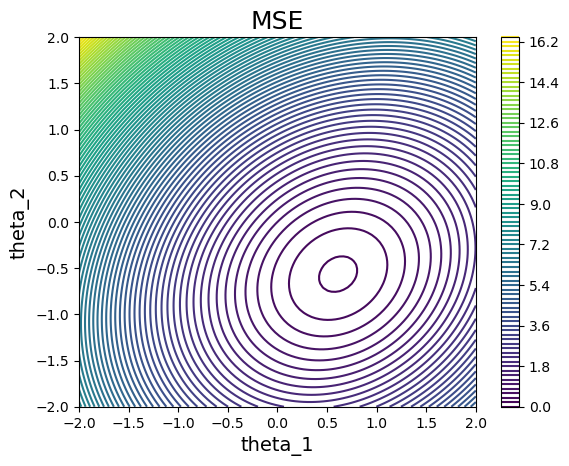

In [13]:
# Run the code below. 
fig, axes = plot_MSE_contour(X, y)

**If your implementation of `MSE` is correct, the output should look like [this](https://i.imgur.com/O53kFuB.png).**

### Problem 1.4 (10 points): Compute the gradient of MSE

- Write out the gradient of MSE with respect to $\theta_1$ and $\theta_2$, i.e., $\frac{\partial}{\partial \theta_1} L(\theta_1, \theta_2)$ and $\frac{\partial}{\partial \theta_2} L(\theta_1, \theta_2)$. Your answer should be a formula  involving $\theta_1, \theta_2$ and other terms. You can use the same typesetting methods as in Problem 1.3.

**[Write your answer here]**
$$
\nabla L(\theta) = (-\frac{2}{n} \sum_{i=1}^{n} x_{i1} (y_i - \theta_1 x_{i1} - \theta_2 x_{i2}),  -\frac{2}{n} \sum_{i=1}^{n} x_{i2} (y_i - \theta_1 x_{i1} - \theta_2 x_{i2}))
$$

- Using your answer from the previous question, implement the function `gradient_mse` that computes the gradient of MSE. This function should output a tuple, where the first value is the partial derivative with respect to $\theta_1$, and the second values is the partial derivative with respect to $\theta_2$. The two together make up the gradient vector (for this problem).

In [14]:
def gradient_mse(X, y, theta_1, theta_2):
    '''
    X:       [# data points, # features], feature vectors
    y:       [# data points], labels
    theta_1: the first parameter of linear model
    theta_2: the second parameter of linear model
    '''
    
    ### YOUR CODE STARTS HERE ###
    n = X.shape[0]
    
    sum_1 = 0;
    for i in range(n):
        sum_1 += X[i][0] * (y[i] - (theta_1 * X[i][0]) - (theta_2 * X[i][1]))
    grad_1 = (-2 * sum_1) / n
    
    sum_2 = 0;
    for i in range(n):
        sum_2 += X[i][1] * (y[i] - (theta_1 * X[i][0]) - (theta_2 * X[i][1]))
    grad_2 = (-2 * sum_2) / n



    ###  YOUR CODE ENDS HERE  ###
    
    return grad_1, grad_2

In [15]:
grad_1, grad_2 = gradient_mse(X, y, theta_1_random, theta_2_random)
print(f' gradient w.r.t theta_1_random: {grad_1}' +
      f'\n gradient w.r.t theta_2_random: {grad_2}')

 gradient w.r.t theta_1_random: -2.8684318094737664
 gradient w.r.t theta_2_random: 3.5872944288011466


**Sample output:** You can test your implementation by running `gradient_mse(X, y, 1, 0.5)`. Your output numbers should match those given below:
$$ \left.\frac{\partial}{\partial \theta_{1}} L\left(\theta_{1}, \theta_{2}\right)\right|_{\theta_{1}=1, \theta_{2}=0.5} = 0.33749394651690023 $$

$$ \left.\frac{\partial}{\partial \theta_{2}} L\left(\theta_{1}, \theta_{2}\right)\right|_{\theta_{1}=1, \theta_{2}=0.5} = 1.9695171608291338 $$

In [16]:
sample_grad_1, sample_grad_2 = gradient_mse(X, y, 1, 0.5)
print(f' gradient w.r.t theta_1_random: {sample_grad_1}' + 
      f'\n gradient w.r.t theta_2_random: {sample_grad_2}')

 gradient w.r.t theta_1_random: 0.33749394651690034
 gradient w.r.t theta_2_random: 1.9695171608291344


### Problem 1.5 (15 points): Gradient descent algorithm

- Implement the function `gradient_descent`. This function should return a list of `theta_1's`, a list of `theta_2's`, and a list of `mse's`, containing the value of each corresponding variable at each step.

In [17]:
def gradient_descent(X, y, theta_1_init, theta_2_init, lr=0.001, max_iters=100, 
                     display_boundary=False):
    
    # log initialization
    theta_1s = [theta_1_init]
    theta_2s = [theta_2_init]
    mses = [MSE(X, y, theta_1_init, theta_2_init)]
    
    theta_1, theta_2 = theta_1_init, theta_2_init
    
    for iter in range(max_iters):
    
        ### YOUR CODE STARTS HERE ###
        
        # compute the gradient of MSE w.r.t to theta_1 and theta_2
        # (i.e., grad_1 and grad_2)
        grad_1, grad_2 = gradient_mse(X, y, theta_1, theta_2)
        
        # update theta_1 and theta_2 based on the gradients and learning rate (lr)
        theta_1, theta_2 = theta_1 - (lr * grad_1), theta_2 - (lr * grad_2)
        
        # compute the MSE based on the updated parameters theta_1 and theta_2
        mse = MSE(X, y, theta_1, theta_2)

        ###  YOUR CODE ENDS HERE  ###
        
        theta_1s.append(theta_1)
        theta_2s.append(theta_2)
        mses.append(mse)
        
        # it will help you visualize the boundary after 40 iterations
        # (i.e., 40 parameter updates)
        if iter % 20 == 0 and display_boundary:
            plot_boundary(X, y, theta_1, theta_2)

    return theta_1s, theta_2s, mses

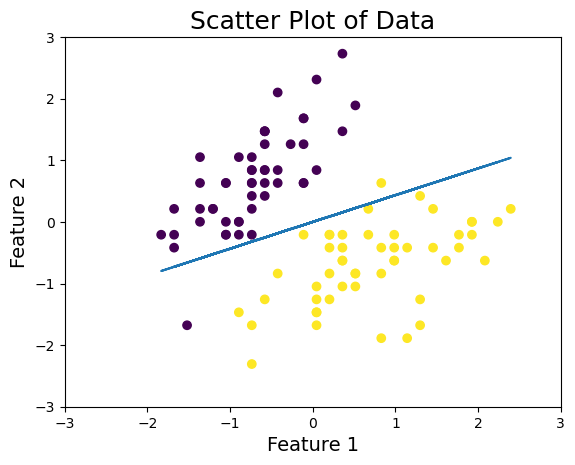

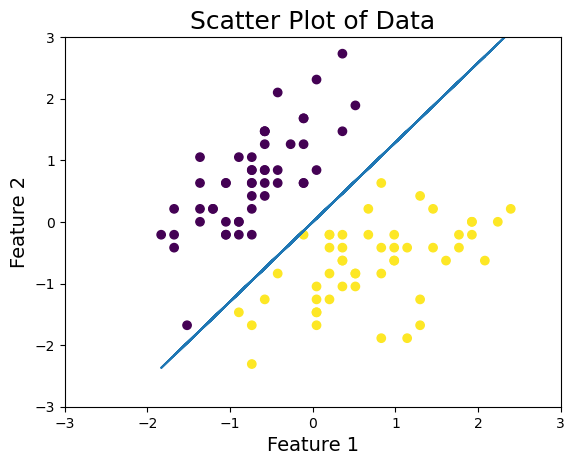

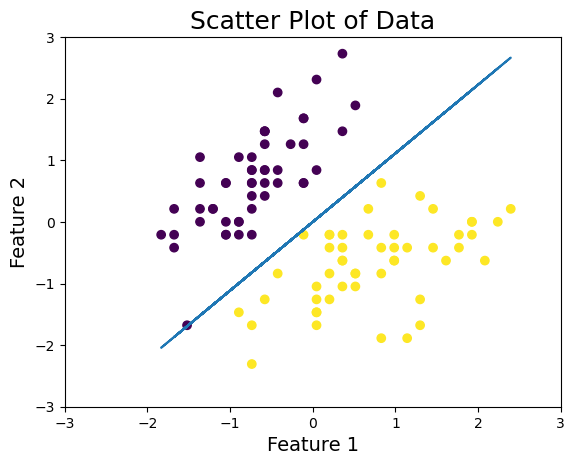

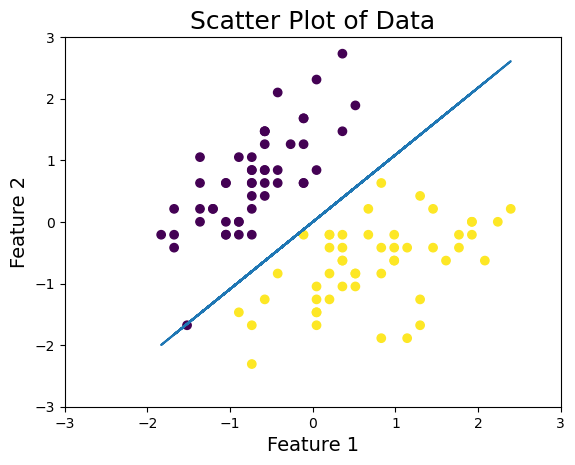

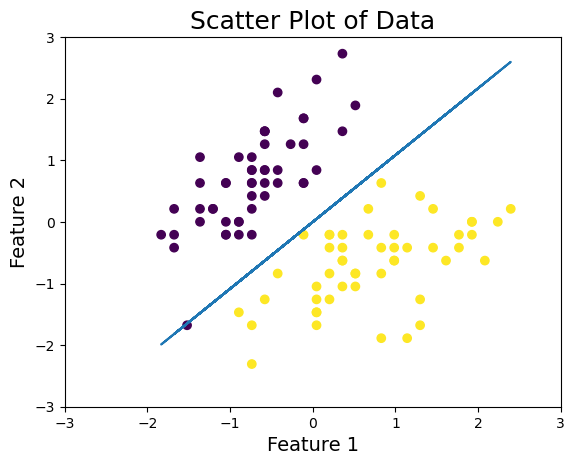

In [18]:
# Run the code below to fit a model using MSE. Don't change the function argument values we provide: 
# (i.e., the learning rate is 0.05, maximum iteration is 100 and display boundary during gradient descent).
theta_1s, theta_2s, mses = gradient_descent(X, y, theta_1_random, theta_2_random, 
                                          lr=0.05, max_iters=100, 
                                            display_boundary=True)

- Create a plot of MSE vs training iteration to check that it converges. You can run the code given below to do this.

Text(0, 0.5, 'MSE')

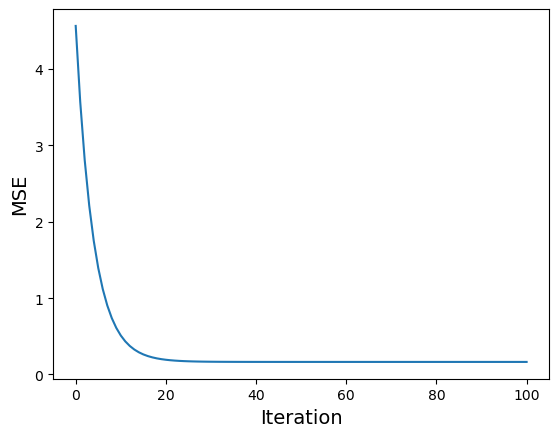

In [19]:
# Run the code below to create a plot of MSE vs training iteration
fig, axes = plt.subplots()
axes.plot(mses)
axes.set_xlabel('Iteration', fontsize=14)
axes.set_ylabel('MSE', fontsize=14)

**If your implementation of `gradient_descent` is correct, the curve should converge.**

### Problem 1.6 (10 points): Plot the trajectory of gradient descent 

- Using `axes.arrow`, show the position of $\theta$ at every step, and the corresponding gradient vectors. 

In [20]:
# Run the code below after finishing Problem 1.5
# In this problem, the initialization of (theta_1, theta_2) is (2,2)
# Don't change any function arguments we give you here.
theta_1s_demo, theta_2s_demo, _ = gradient_descent(X, y, 2, 2, lr=0.3, 
                                                   max_iters=10, 
                                                   display_boundary=False)

In [23]:
def gradient_descent_trajectory(X, y, theta_1s, theta_2s):
    fig, axes = plot_MSE_contour(X, y)

    theta_1s = np.asarray(theta_1s)
    theta_2s = np.asarray(theta_2s)
    
    ### YOUR CODE STARTS HERE ###

    # use 'axes.arrow' (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html)
    # to generate one vector with arrow on the fig
    # you should call 'axes.arrow' iteratively to generate the whole gradient decent trajectory step by step.
    # your job is to identify the 'x, y, dx, dy' for axes.arrow, based on 'theta_1s' and  'theta_2s'
    # suggestions of other parameters for 'axes.arrow': head_width = 0.1, color = 'red'
    
    for i in range(len(theta_1s) - 1):
        axes.arrow(theta_1s[i], theta_2s[i],
                   theta_1s[i + 1] - theta_1s[i],
                   theta_2s[i + 1] - theta_2s[i], 
                   head_width=0.07, color='red')

    ###  YOUR CODE ENDS HERE  ###
    axes.set_xlim(-2,2)
    axes.set_ylim(-2,2)

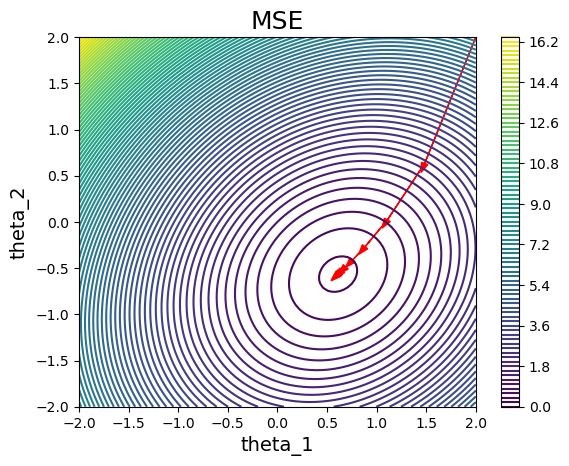

In [24]:
gradient_descent_trajectory(X, y, theta_1s_demo, theta_2s_demo)

##### **If your implementation of `gradient_descent` is correct, the output should be substantially the same as [this](https://i.imgur.com/Nxn9pNb.png).**

- Describe in words what you observe from the trajectory and explain it.

**[Write your answer here]**

The error drops sharply in the first few iterations. The decrease becomes less steep as the iteration goes on. MSE is at its global minimum in the middle of the circle, where the last trajectory arrow points to. (The last arrow may not look like it is pointing in the middle because of the arrow head size.)

---
## Problem 2: Logistic Regression

<font color='red'><b>Important: We will need to install two more libraries for this assignment, do not skip this.</b></font>

We need to run `conda install -c conda-forge simplejson nltk` in order to install `nltk` and `simplejson` into your conda environment.

We need `nltk` to work with natural language data, as well as `simplejson` to open json files.

In this problem, you will work with the sklearn implmentation of logistic regression on a small toy data set (the Iris data we used earlier) and a on more realistic dataset.

In [25]:
import simplejson as json
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tu845\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tu845\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\tu845\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


### Problem 2.1 (10 points): Classify Iris dataset via scikit-learn implementations of logistic regression

Using sklearn's `LogisticRegression` class, train a model (`classifier`) that fits the Iris dataset we have been using from the previous question. Make sure to use the parameters `penalty='none', fit_intercept=False` when instantiating the class. You can view the documentation for this class [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

- Print out the values of $\theta_1$ and $\theta_2$. (Hint: You can get the values of `theta_1` and `theta_2` from `classifier.coef_`)
- Plot the decision boundaries and the data.

125.87229637321337 -106.28951177865996


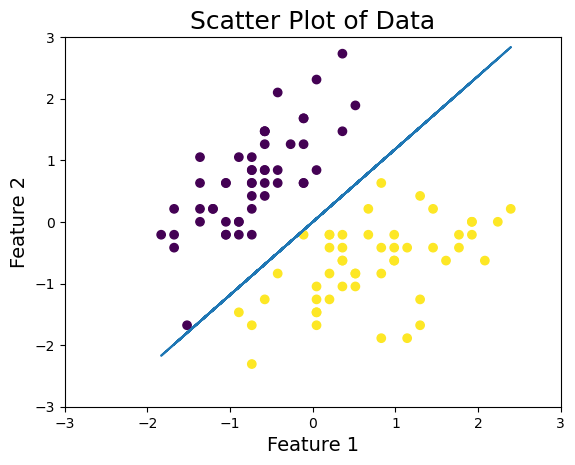

In [26]:
### YOUR CODE STARTS HERE ###

# set up the classfier
classifier = LogisticRegression(penalty='none', fit_intercept=False).fit(X, y)

# get classifier parameters
theta_1, theta_2 = classifier.coef_[0]

###  YOUR CODE ENDS HERE  ###

print(theta_1, theta_2)
plot_boundary(X, y, theta_1, theta_2)

Using sklearn's `LogisticRegression` class, train a model that fits the Iris dataset we have been using from the previous question. Use the parameters `penalty='none', fit_intercept=True` when instantiating the class.

- Print out the values of $\theta_0$, $\theta_1$ and $\theta_2$. (Hint: You can get the values of `theta_0` from `clf.intercept_`)

You should find that $\theta_0$ is not zero.

In [28]:
### YOUR CODE STARTS HERE ###

# set up the classfier with bias
classifer = LogisticRegression(penalty='none', fit_intercept=True).fit(X, y)

# get classifier parameters
theta_0 = classifer.intercept_[0]
theta_1, theta_2 = classifier.coef_[0]

###  YOUR CODE ENDS HERE  ###

print(theta_0, theta_1, theta_2)

9.248382911319895 125.87229637321337 -106.28951177865996


- Implement the function `plot_boundary_w_intercept`. Think about how to modify `plot_boundary` to make it compatible with the linear model with bias (i.e., $\theta_0$ is not necessarily zero).

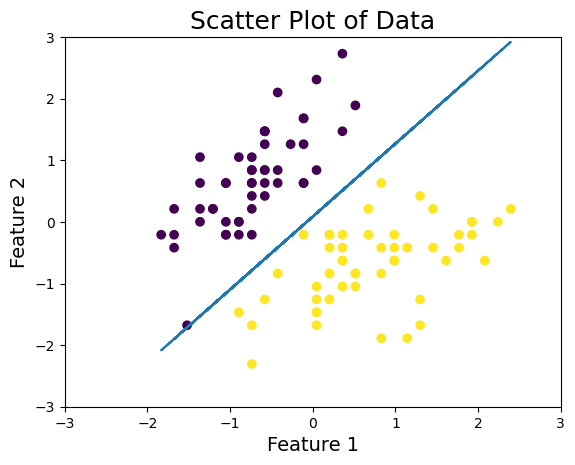

In [29]:
def plot_boundary_w_intercept(X, y, theta_0, theta_1, theta_2): 
    '''
    X:       [# feature vectors, # features], feature vectors
    y:       [# feature vectors], labels
    theta_0: the bias of linear model
    theta_1: the first parameter of linear model
    theta_2: the second parameter of linear model
    '''
    
    fig, axes = plot_data(X, y)
    
    ### YOUR CODE STARTS HERE ###
    X_1 = X[:,0]
    X_2 = X[:,1]
    axes.plot(X_1, ((-1 * theta_0) / theta_2) - (theta_1* X_1) / theta_2)


    ###  YOUR CODE ENDS HERE  ###

# Call your function on the classifier you fit in the previous point
plot_boundary_w_intercept(X, y, theta_0, theta_1, theta_2)

### Problem 2.2 (10 points): Exploring the Yelp Dataset

The Yelp dataset consists of millions of reviews with their scores (1 to 5), all available for public research. We will only use a subset of the reviews here. This review data can be used in a classification task, where we are given a review and we predict whether it is a positive or a negative review. We will consider a review as *negative* if it has a score $\leq 2$, or *positive* if it has a score $\geq 4$.

Below we pre-process the dataset for you using what's known as a bag-of-words approach. You will run the code create a bag of words (BOW) representation from text documents, using the Vectorizer function in scikit-learn to convert each text review (a string) to a fixed-length vector of numbers that we use as a feature vector for a classifier. 

Note that the details of how reviews are converted to vectors is not particularly important for you to follow in detail. What is important is to be aware that after we run the code below we will get a data matrix with n rows (one per review) and d features (where each of the d features corresponds to a different word). Each row in the data matrix is a feature vector for a Yelp review, where the values in the feature vector correspond to how often different words occur in the review.

In a bit more detail, the bag of words representation of text is a way to turn text (in the form of a string) into a vector of some fixed dimension. More specifically, every document (e.g., a review) is converted into a vector $\mathbf{x}$, where $\mathbf{x}_j$ denotes whether the $j$th word from the vocabulary list is used in the sentence. For example, if our vocabulary is `[he, she, his, her, loves, likes, dogs, cats, cute, nice]`, the sentence `"he loves cats and she loves dogs"` can be vectorized as `[1, 1, 0, 0, 2, 0, 1, 1, 0, 0]`. This representation allows us to compare documents (e.g., reviews) in the same way we have been doing with tabular data and images.



The inputs are 
- a filename (you will use "yelp_reviews.json") containing the reviews in JSON format (provided in the .zip file)
- the min_pos and max_neg parameters (use the default values.)

The outputs are
- **X**: Feature Matrix in compressed sparse row format.
    - $\textbf{X}$ is in shape of [# reviews, # terms in vocabulary]  (where #terms = #features)
    - $\textbf{X}_{ij}$ indicates the number of the $j$th term in the vocabulary existing in the $i$th review.
- **y**: Review label vector
- **text**: Raw reviews
- **vectorizer_BOW.vocabulary_**: A mapping of terms to feature indices, somes terms are excluded



**NOTE**: 
- please read the scikit-learn tutorial on text feature extraction before you start this problem: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction  (its fine to just read Sections 6.2.3.1 to 6.2.3.3)

In [30]:
def create_bow_from_reviews(filename, min_pos=4, max_neg=2): 
    
    print('Loading the file:', filename) 
    with open(filename, 'r') as jfile:
        data = json.load(jfile)
        
    print('Total number of reviews extracted =', len(data))

    text = []
    y = []
    print('Extracting tokens from each review.....' + 
          '(can be slow for a large number of reviews)......')   
    for d in data: 	# can substitute data[0:9] here if you want to test this function on just a few reviews 	
        review = d['text']     # keep only the text and label
        stars = int(d['stars'])
        if stars >= min_pos:   # represent scores > min_pos as "1"
            score = 1
        elif stars <= max_neg:  # represent scores < max_neg as "0"
            score = 0
        else: # do not consider reviews with scores above max_neg and below min_pos (these reviews will be dropped)
            continue  
 
        text.append(review)   
        y.append(score)
    
    # create an instance of a CountVectorizer, using 
    # (1) the standard 'english' stopword set 
    # (2) only keeping terms in the vocabulary that occur in at least 1% of documents
    # (3) allowing only unigrams in the vocabulary (use "ngram_range=(1, 1)" to do this)
    vectorizer = CountVectorizer(stop_words='english',min_df=0.02, 
                                 ngram_range=(1, 1))

    # create a sparse BOW array from 'text' using vectorizer
    X = vectorizer.fit_transform(text)
 
    print('Data shape: ', X.shape)
    
    # you can uncomment this next line if you want to see the full list of tokens in the vocabulary  

    return X, y, vectorizer, text

In [31]:
X, y, vectorizer_BOW, text = create_bow_from_reviews('yelp_reviews.json') 

Loading the file: yelp_reviews.json
Total number of reviews extracted = 20000
Extracting tokens from each review.....(can be slow for a large number of reviews)......
Data shape:  (17501, 404)


- **Implement the function `review_word_count_histogram`, which generates a histogram to show how many unique words (from the vocabulary) are in each review. That is, for each review, count the number of unique words in the review, and plot a histogram illustrating these counts.**

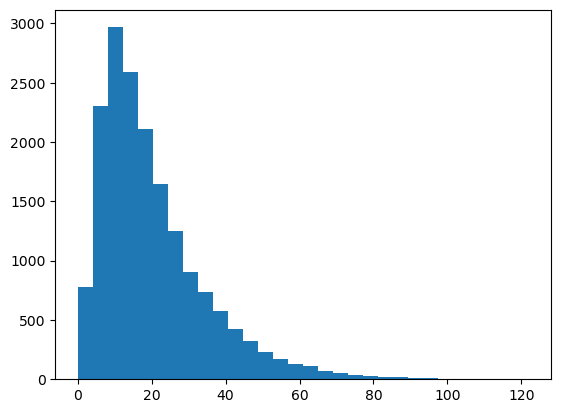

In [32]:
def review_word_count_histgram(X):
    '''
    X:  [# feature vectors, # features], feature vectors
    '''
    ### YOUR CODE STARTS HERE ###
    # For each reviews in X, find the total number of unique words.
    # Histogram should display how many reviews have a number of unique terms
    # Histogram:
    #    x-axis  number of unique terms
    #    y-axis  count of reviews that have a certain number of unique terms.
    # Array that us fed into histogram is the array of number of unique terms from all reviews
    
    unique_term_count = []
    for each_review in X:
        unique_term_count.append(each_review.nnz)
        
    plt.hist(unique_term_count, bins = 30)

    ###  YOUR CODE ENDS HERE  ###

review_word_count_histgram(X)

### Problem 2.3 (10 points): Fit a logistic regression classifier on Yelp dataset.

You will now build a logistic regression model to classify reviews as either negative or positive. In the code you are given, a training/testing split has already been created for you.

- Build a logistic classifier on the training subset. **Please use 'l1' `penality` type, 'liblinear' `solver` and enable `fit_intercept`.**
- Evaluate the accuracy of your model on the test subset.

**NOTE**: 
before starting this problem please read the scikit-learn documentation on [linear classifiers](https://scikit-learn.org/stable/modules/linear_model.html) and [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

In [34]:
def logistic_classification(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=seed)
   
    print('Number of training examples: ', X_train.shape[0])
    print('Number of testing examples: ', X_test.shape[0])   
    print('Vocabulary size: ', X_train.shape[1]) 
    
    ### YOUR CODE STARTS HERE ###
    
    # Specify the logistic classifier model, 
    # Please use 'l1' penality type, 'liblinear' solver and enable fit_intercept
    classifier = LogisticRegression(penalty='l1', solver='liblinear', 
                                    fit_intercept=True).fit(X_train, y_train)
    
    # Compute and print accuracy on the test data
    test_predictions = []
    
    theta_0 = classifer.intercept_[0]
    all_thetas = classifier.coef_[0]
    decision_boundary = 0.5
    

    for each_review in X_test:
        
        # Get value of Z(x; theta)
        z_sum = 0
        for i in range(len(all_thetas)):
            z_sum += all_thetas[i] * each_review.toarray()[0][i]
        z_value = theta_0 + z_sum
        
        # Calculate f(x; theta) from Z(x; theta)
        model_value = 1 / (1 + np.exp(-1 * z_value))
        if model_value > decision_boundary:
            test_predictions.append(1)
        else:
            test_predictions.append(0)
    
    # Calculate accuracy
    correct_count = 0
    for index in range(len(y_test)):
        if y_test[index] == test_predictions[index]:
            correct_count += 1
    
    test_accuracy = correct_count / len(y_test)

    ###  YOUR CODE ENDS HERE  ###
    
    print('\nTesting accuracy:', format( 100*test_accuracy , '.2f') )
    
    return classifier

In [35]:
logistic_classifier = logistic_classification(X, y)

Number of training examples:  12250
Number of testing examples:  5251
Vocabulary size:  404

Testing accuracy: 78.40


### Problem 2.4 (10 points): Find the top k most negative/most positive features

In this problem, you will complete the function `most_significant_terms`. This function will:

- print and return the most significant positive and negative weights of your logistic regresson model
- print and return the words associated with these weights.

The function `most_significant_terms` takes as input
- a scikit-learn trained logistic regression classifier (e.g., trained in Problem 2.3) 
- a scikit-learn vectorizer object that produced the BOW features for the classifier

and prints out
- the terms in the vocabulary tokens with the **top 10** largest positive weights  
- the terms in the vocabulary with the **top 10** smallest (i.e., largest in terms of absolute value) negative weights. For example, a weight of $-10$ is smaller than a weight of $-1$. 

Hint: Check the attributes section of the vectorizer documentation (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to find where the mapping between words and indices are located.

In [36]:
def most_significant_terms(classifier, vectorizer, K):
    # cycle through the positive weights, in the order of largest weight first and print out
    # K lines where each line contains
    # (a) the term corresponding to the weight (a string)
    # (b) the weight value itself (a scalar printed to 3 decimal places)
    
    ### YOUR CODE STARTS HERE ###

    # extract coefficients from trained model and sort based on coefficient
    sorted_coefs = np.sort(classifier.coef_[0])
    list_vocabulary = vectorizer.get_feature_names_out()
        
    # extract corresponding weights
    topK_pos_weights = sorted_coefs[(-1 * K): -1]
    
    # extract topK positive terms
    topK_pos_terms = []
    
    for pos_weight in topK_pos_weights:
        weight_index = np.where(classifier.coef_[0] == pos_weight)[0][0]
        topK_pos_terms.append(list_vocabulary[weight_index])
        
    topK_pos_weights = [round(item, 3) for item in topK_pos_weights]
    
    
    # extract corresponding weights
    topK_neg_weights = sorted_coefs[0: K]
    
    # extract topK negative terms
    topK_neg_terms = []
    
    for neg_weight in topK_neg_weights:
        weight_index = np.where(classifier.coef_[0] == neg_weight)[0][0]
        topK_neg_terms.append(list_vocabulary[weight_index])
        
    topK_neg_weights = [round(item, 3) for item in topK_neg_weights]


    ###  YOUR CODE ENDS HERE  ###
    print('topK_pos_weights', topK_pos_weights)
    print('topK_pos_terms', topK_pos_terms)
    print('topK_neg_weights', topK_neg_weights)
    print('topK_neg_terms',topK_neg_terms)
    
    return (topK_pos_weights, topK_neg_weights, topK_pos_terms, topK_neg_terms)

In [37]:
output = most_significant_terms(logistic_classifier, vectorizer_BOW, K=10)

topK_pos_weights [1.557, 1.634, 1.673, 1.726, 1.727, 1.761, 1.986, 2.032, 2.306]
topK_pos_terms ['easy', 'enjoyed', 'perfect', 'thank', 'wonderful', 'awesome', 'amazing', 'excellent', 'delicious']
topK_neg_weights [-3.322, -1.544, -1.299, -1.269, -1.174, -1.109, -1.075, -0.903, -0.899, -0.857]
topK_neg_terms ['worst', 'okay', 'disappointed', 'tasted', 'ok', 'guess', 'won', 'maybe', 'slow', 'money']


 - What do you observe from the above output? Provide a short explanation for why you see what you see.

**[Write your answer here]**

The top Kth most negative terms are less informative than the top Kth most positive terms. Words such as "tasted" and "guess" gets put as a negative experience even though the word in itself doesn't indicate preference. On the other hand, the top Kth most positive terms accurately represent positive impression.

Most of the top Kth most negative and positive terms are words that are relevant in deciding whether a review is positive or negative.

### Problem 2.5 (10 points): Tune regularlization parameter on Yelp dataset

In this problem, you will tune the regularization parameter of your logistic regression model in order to increase your accuracy.

- Complete the function `accuracy_vs_reg`. This function should perform L1 regularization using the values defined in the array 'cs' below. For every value of the regularization parameter in `cs`, you should store the resulting training accuracy in the list `train_accuracies` and the resulting testing accuracy in the list `test_accuracies`.
- Use your implementation to plot the curves of train/test accuracy vs regularization strength, for the Yelp data we used above. The plotting code necessary to do this is already given to you, and you only need to call the function.

In [38]:
def accuracy_vs_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=seed)
    
    # log initialization
    coefs_ = []
    train_accuracies = []
    test_accuracies = []
    cs = [0, 0.1, 1, 10, 50]
    
    ### YOUR CODE STARTS HERE ###
    for c in cs:
        
        # Specify the logistic classifier model
        if c == 0:
            classifier = LogisticRegression(penalty='none', fit_intercept=True)
            classifier = classifier.fit(X_train, y_train)
        else:
            # Refer https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
            # to see which argument can adjust the regularization strength,
            # Additionally, please use 'l1' penalty type, 'liblinear' solver and enable fit_intercept
            classifier = LogisticRegression(penalty='l1', C=c, fit_intercept=True, 
                                            solver='liblinear')
            classifier = classifier.fit(X_train, y_train)
        
        
        # log model coefficients
        coefs_.append(classifier.coef_[0])    
        theta_0 = classifier.intercept_[0]
        all_thetas = classifier.coef_[0]
        decision_boundary = 0.5
        
        # Compute training accuracy
        
        train_predictions = []
    
        for each_review in X_train:
            z_sum = 0
            for i in range(len(all_thetas)):
                z_sum += all_thetas[i] * each_review.toarray()[0][i]
            z_value = theta_0 + z_sum
            model_value = 1 / (1 + np.exp(-1 * z_value))
            if (model_value > decision_boundary):
                train_predictions.append(1)
            else:
                train_predictions.append(0)

        correct_count = 0
        for index in range(len(y_train)):
            if y_train[index] == train_predictions[index]:
                correct_count += 1
        train_accuracy = correct_count / len(y_train)
        
        # log model training and test accuracies
        train_accuracies.append(train_accuracy)
        
        
        
        # Compute test accuracy
            
        test_predictions = []
        for each_review in X_test:
            z_sum = 0
            for i in range(len(all_thetas)):
                z_sum += all_thetas[i] * each_review.toarray()[0][i]
            z_value = theta_0 + z_sum
            model_value = 1 / (1 + np.exp(-1 * z_value))
            if (model_value >= decision_boundary):
                test_predictions.append(1)
            else:
                test_predictions.append(0)

        correct_count = 0
        for index in range(len(y_test)):
            if y_test[index] == test_predictions[index]:
                correct_count += 1
        test_accuracy = correct_count / len(y_test)
        
        test_accuracies.append(test_accuracy)

    ###  YOUR CODE ENDS HERE  ###
    
    fig, axes = plt.subplots()
    axes.semilogx(cs, train_accuracies, color='red', label='training accuracy')
    axes.semilogx(cs, test_accuracies, color='blue', label='testing accuracy')
    
    
    axes.set_xlabel('regularization strength', fontsize=14)
    axes.set_ylabel('accuracy', fontsize=14)
    
    axes.legend()

    return train_accuracies, test_accuracies, coefs_

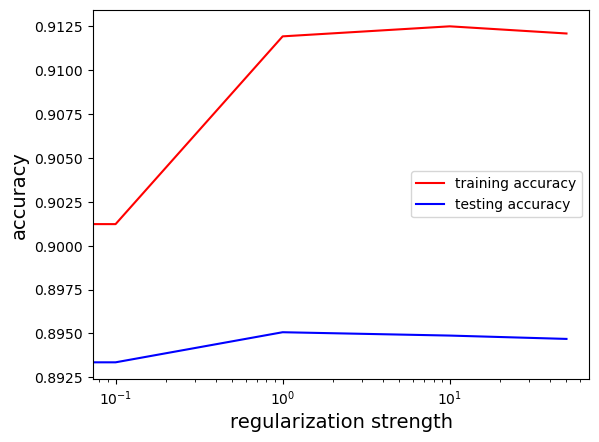

In [39]:
train_accuracies, test_accuracies, coefs = accuracy_vs_reg(X, y)

- Choose a final value for the regularization parameter and justify your choice. You should choose a **single** value from the list `cs` given in the code above. 

**[Write your answer here]**

The best regularization parameter is $10^0$ which is $1$ in cs list because it produce the highest testing accuracy.

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

I did not collaborate or discuss this assignment with anyone, aside from a private question that I asked on EdDiscussion.